### Morpholocial Operators

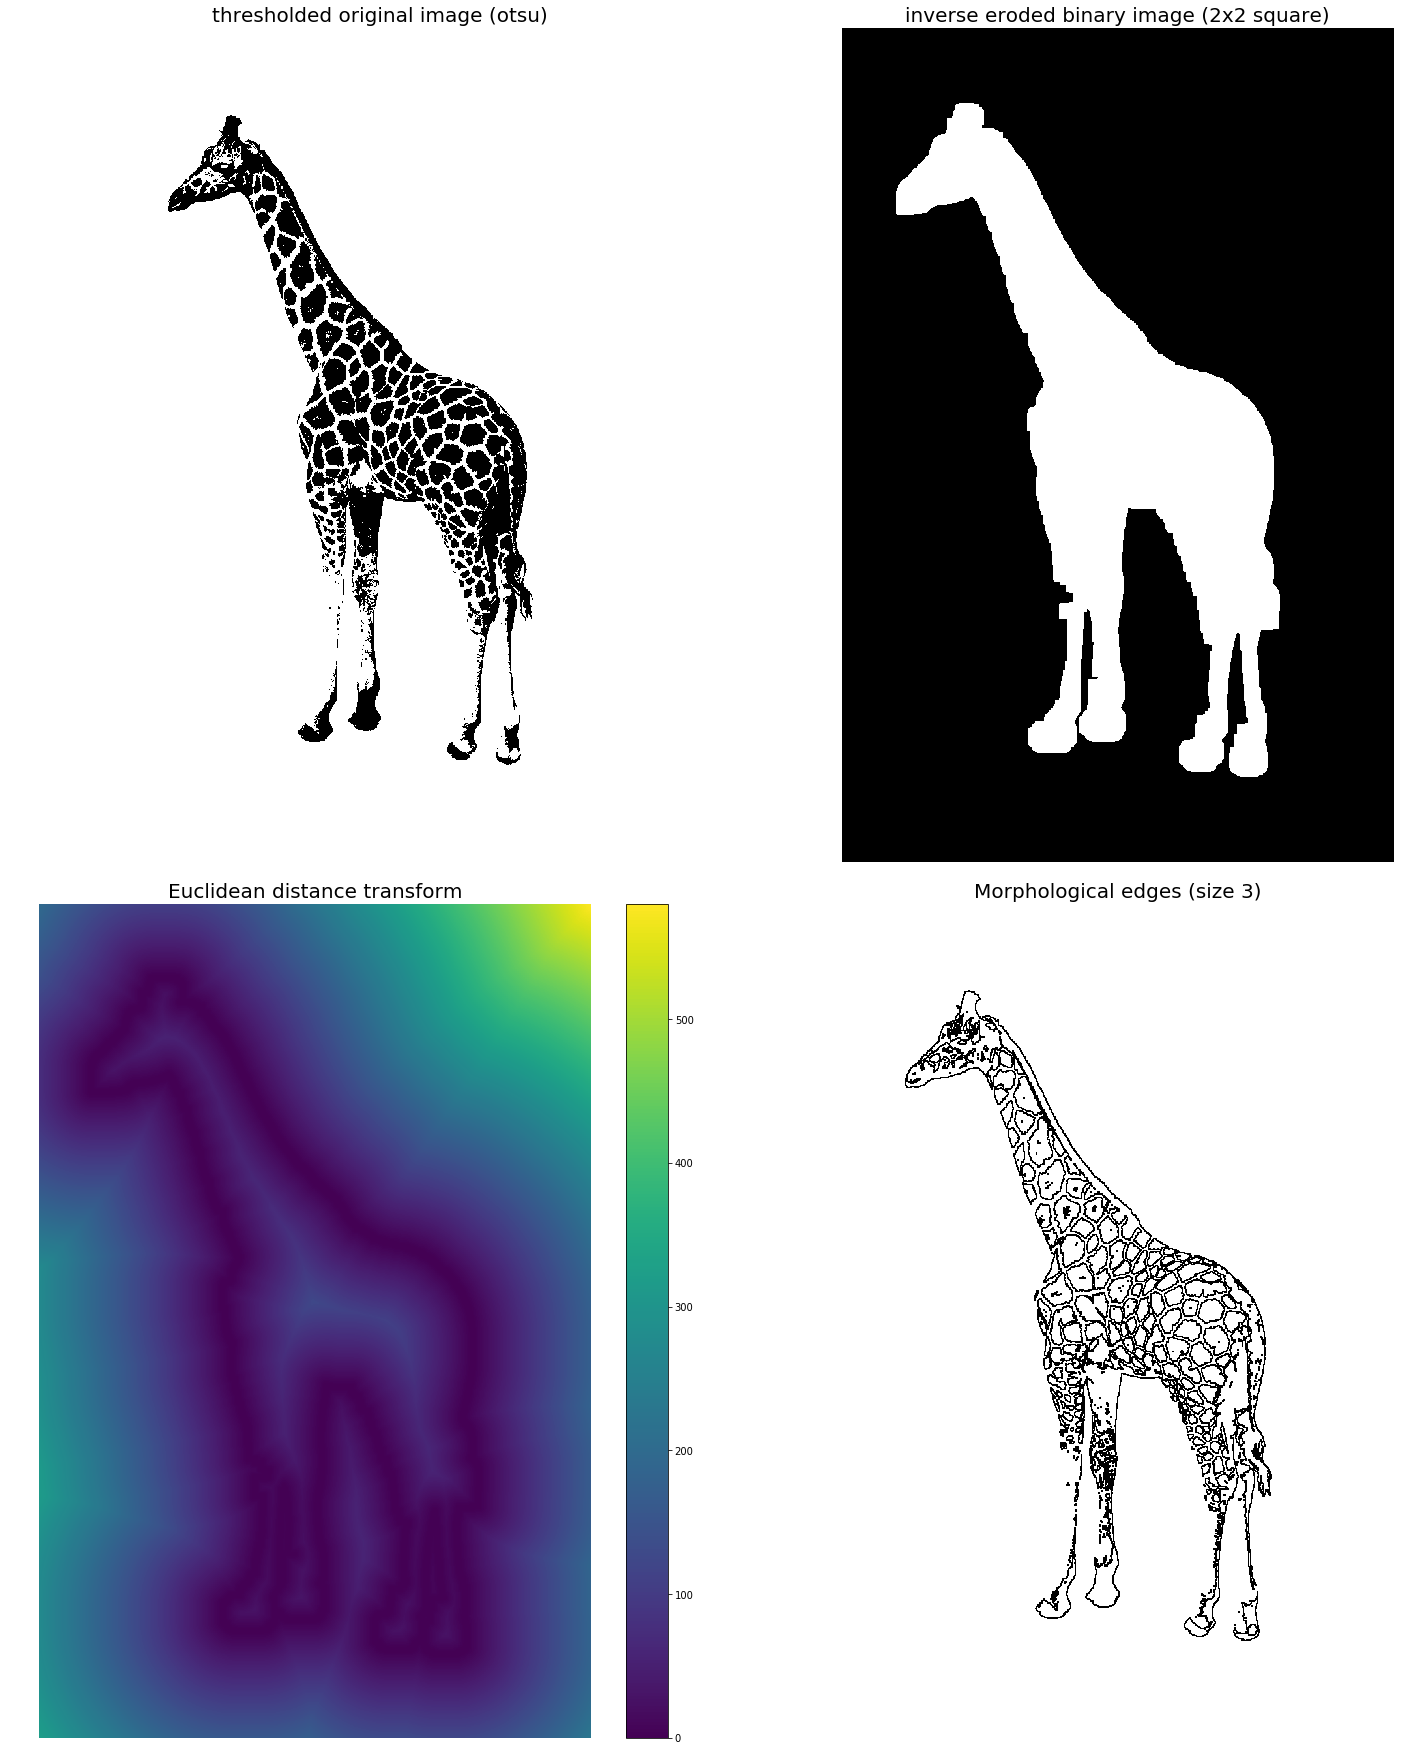

In [60]:
% matplotlib inline

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_fill_holes, morphological_gradient, distance_transform_edt
import numpy as np
import matplotlib.pylab as plt

im = rgb2gray(imread('images/giraffe.jpg'))
thres = threshold_otsu(im)
im = (im > thres).astype(np.uint8)

eroded = binary_erosion(im, structure=np.ones((2,2)), iterations=20)[20:,20:]
eroded = 1 - eroded
dilated = binary_dilation(eroded, structure=np.ones((11,11)))
edges = 1 - morphological_gradient(im, size=3) #dilated5.astype(np.int) - eroded5.astype(np.int)
boundary = np.clip(dilated.astype(np.int) - eroded.astype(np.int), 0, 1)
dt = distance_transform_edt(np.logical_not(boundary))

plt.gray()
plt.figure(figsize=(20,25))
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('thresholded original image (otsu)', size=20)
plt.subplot(222), plt.imshow(eroded), plt.axis('off'), plt.title('inverse eroded binary image (2x2 square)', size=20)
plt.subplot(223), plt.imshow(dt, cmap='viridis'), plt.axis('off'), plt.title('Euclidean distance transform', size=20), plt.colorbar()
plt.subplot(224), plt.imshow(edges), plt.axis('off'), plt.title('Morphological edges (size 3)', size=20)
plt.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


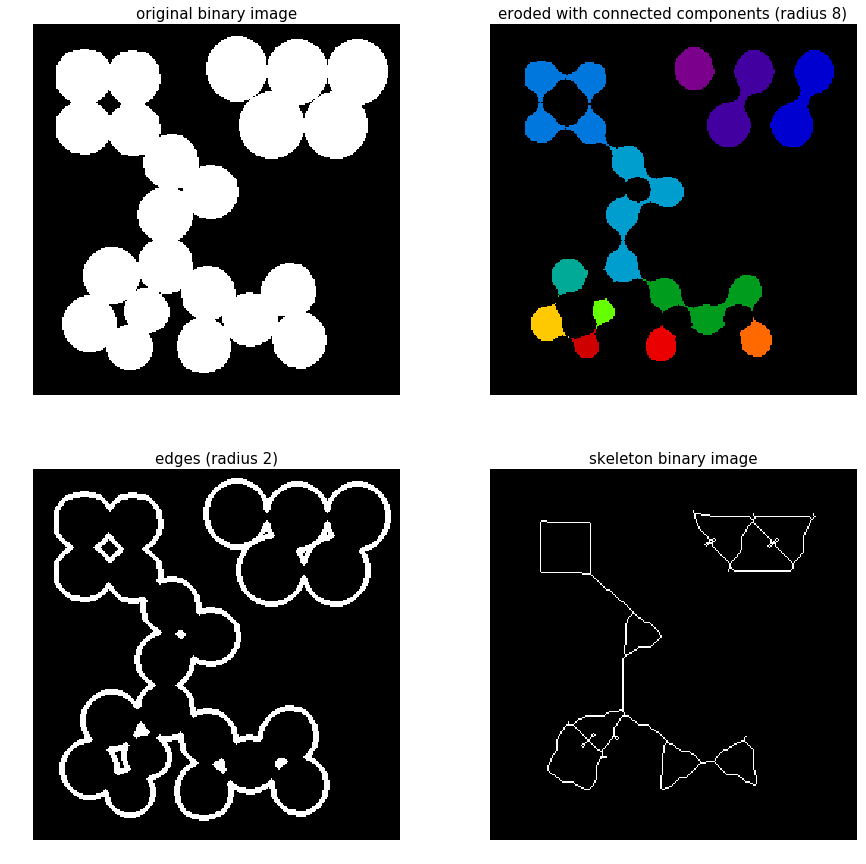

In [55]:
from skimage import morphology as morph
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

im = rgb2gray(imread('images/circles.png'))
im = (im > 0).astype(np.uint8)

disk2 = morph.disk(radius=2)
disk8 = morph.disk(radius=8)

eroded2 = morph.binary_erosion(im, selem=disk2)
eroded8 = morph.binary_erosion(im, selem=disk8)
labeled = morph.label(eroded8, connectivity=1)
dilated2 = morph.binary_dilation(im, selem=disk2)
edges = dilated2.astype(np.int) - eroded2.astype(np.int)

skeleton = morph.skeletonize(im)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('original binary image', size=15)
plt.subplot(222), plt.imshow(labeled, cmap='spectral'), plt.axis('off'), plt.title('eroded with connected components (radius 8)', size=15)
plt.subplot(223), plt.imshow(edges), plt.axis('off'), plt.title('edges (radius 2)', size=15)
plt.subplot(224), plt.imshow(skeleton), plt.axis('off'), plt.title('skeleton binary image', size=15)
plt.show()

### Counting Ojects

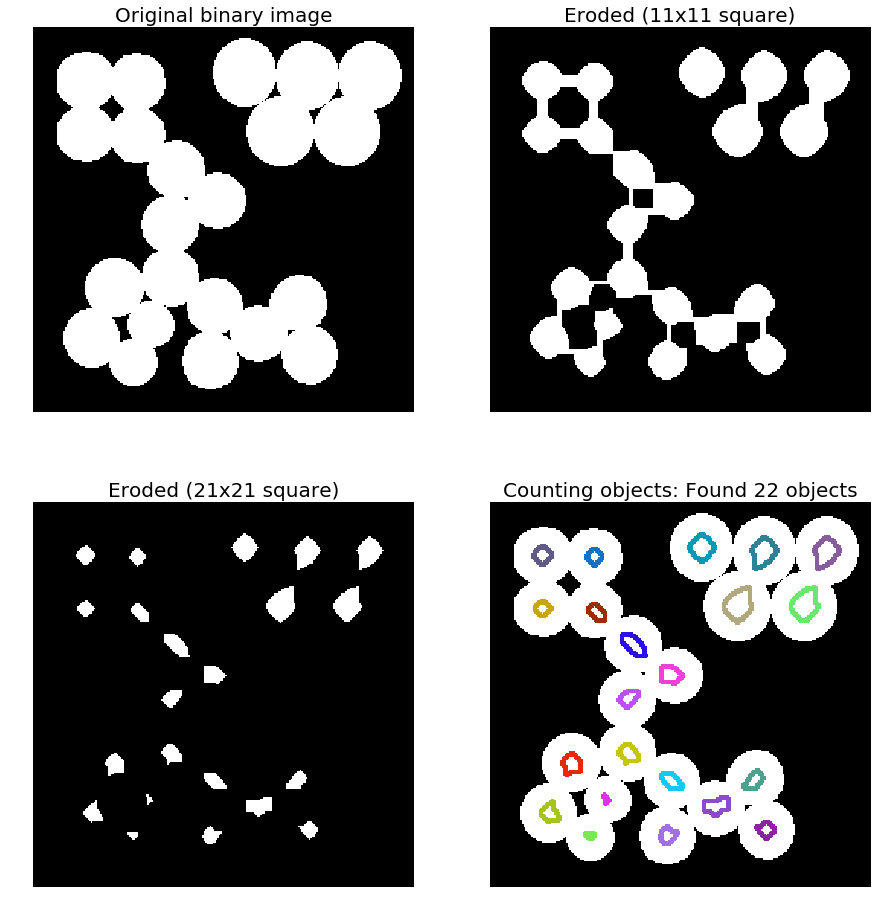

In [44]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('images/circles.png', 0)

kernel = np.ones((11,11),np.uint8)
eroded1 = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel) 

kernel = np.ones((21,21),np.uint8)
eroded = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel) 

_, cnts, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)

count = 0
for c in cnts:
    cv2.drawContours(output, [c], -1, (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)), 2)   
    count += 1
    
text = "Found {} objects".format(count)
plt.gray()
plt.figure(figsize=(15,16))
plt.subplot(221), plt.imshow(image), plt.axis('off'), plt.title('Original binary image', size=20)
plt.subplot(222), plt.imshow(eroded1), plt.axis('off'), plt.title('Eroded (11x11 square)', size=20)
plt.subplot(223), plt.imshow(eroded), plt.axis('off'), plt.title('Eroded (21x21 square)', size=20)
plt.subplot(224), plt.imshow(output), plt.axis('off'), plt.title('Counting objects: ' + text, size=20)
plt.show()

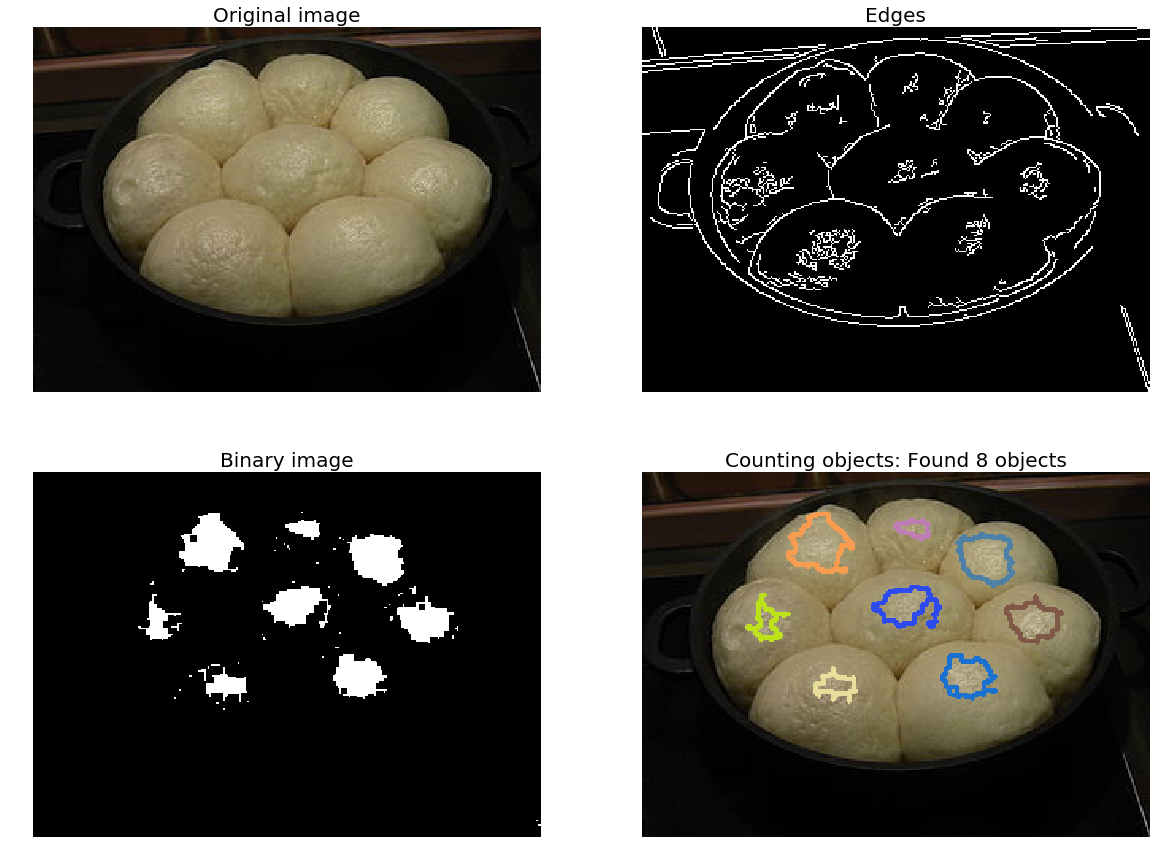

In [31]:
image = cv2.imread('images/rasagolla.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray) #255 - gray
#gray = cv2.equalizeHist(gray)

edged = cv2.Canny(gray, 50, 150)
thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]
kernel = np.ones((4,4),np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #ERODE

#ret, thres = cv2.threshold(edged,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# find contours (i.e., outlines) of the foreground objects in the thresholded image
_, cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()

count = 0
# loop over the contours
for c in cnts:
    # draw each contour on the output image with a 3px thick red
    # outline, then display the output contours one at a time
    #print(cv2.contourArea(c))
    if cv2.contourArea(c) > 5: # ignore small objects
        cv2.drawContours(output, [c], -1, (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)), 2)   
        count += 1
    
text = "Found {} objects".format(count)
plt.figure(figsize=(20,15))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(222), plt.imshow(edged, cmap='gray'), plt.axis('off'), plt.title('Edges', size=20)
plt.subplot(223), plt.imshow(thresh, cmap='gray'), plt.axis('off'), plt.title('Binary image', size=20)
plt.subplot(224), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Counting objects: ' + text, size=20)
plt.show()

### Morphological Pattern Matching with Hit-or-Miss Transform

(1046, 700) (34, 27) (34, 27)


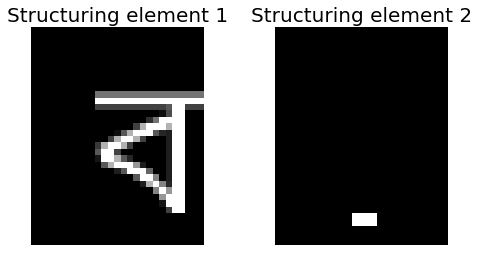

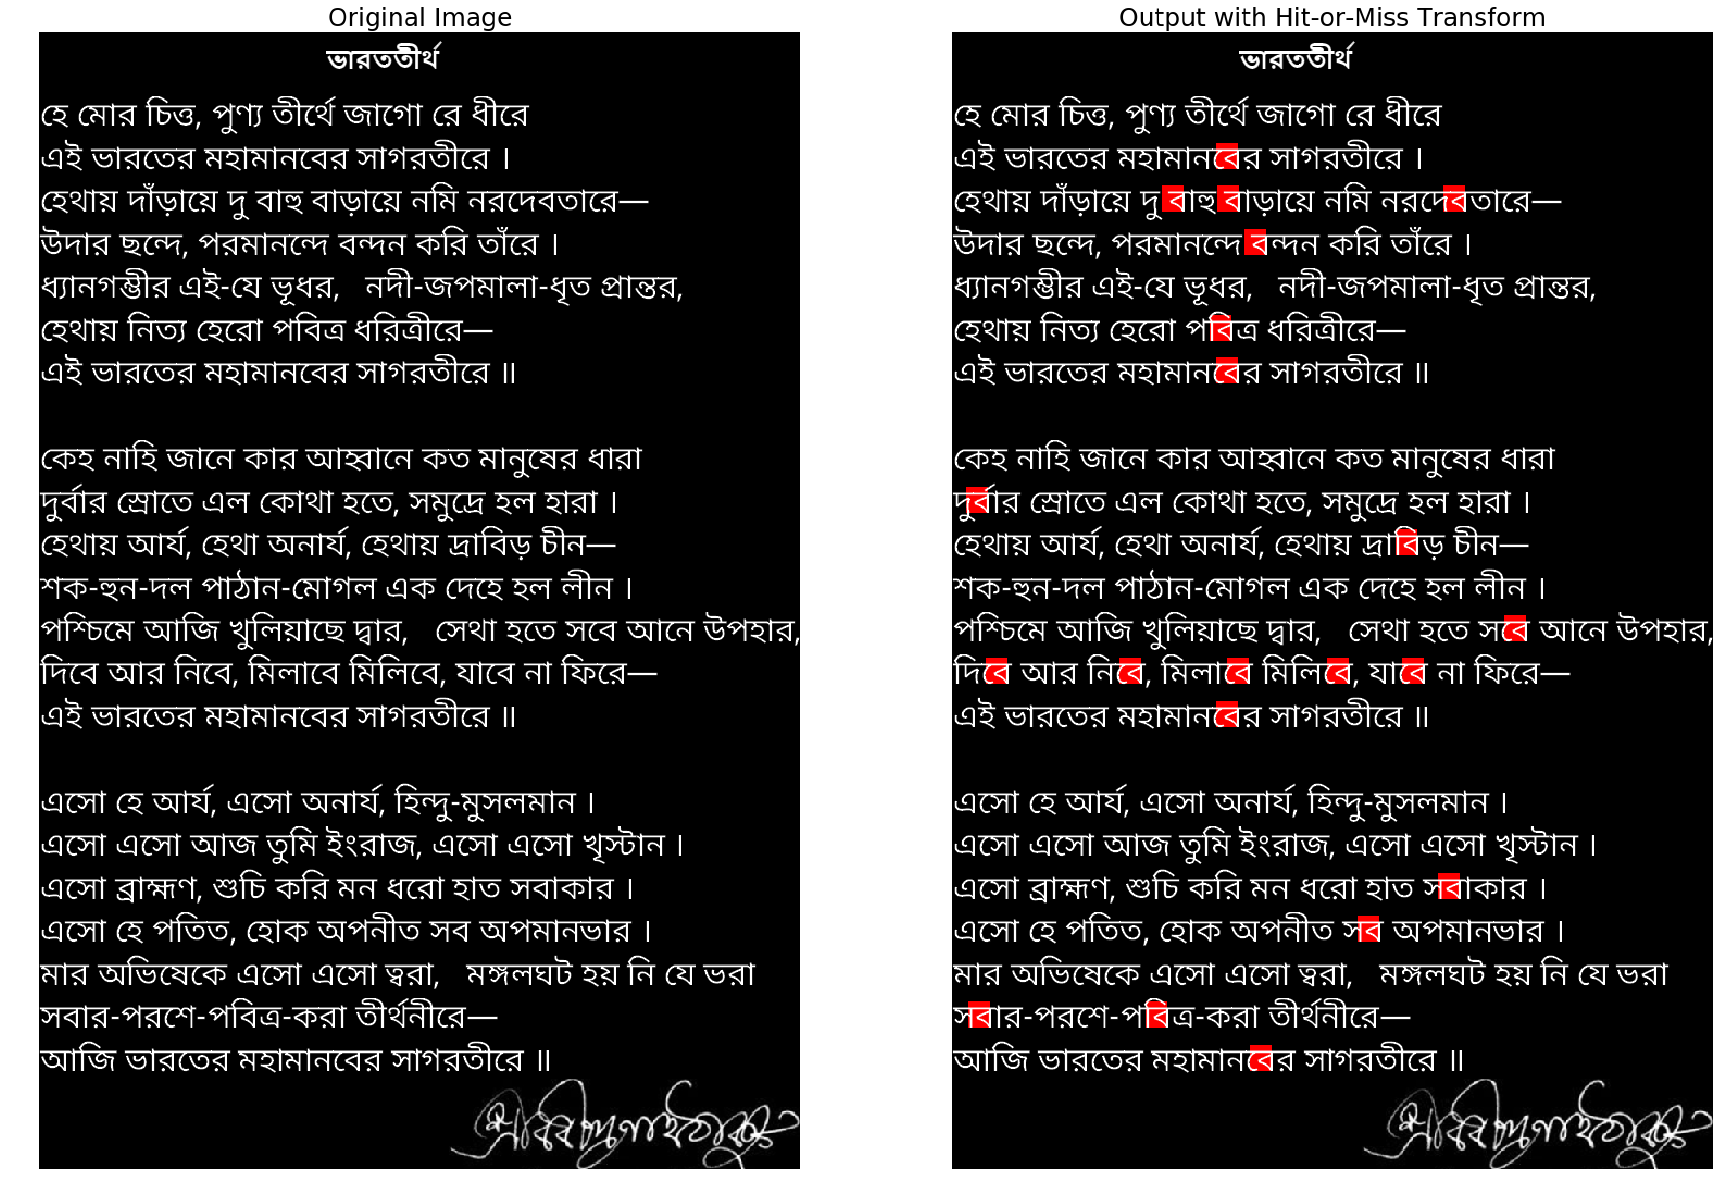

(1046, 700) (34, 27) (34, 27)


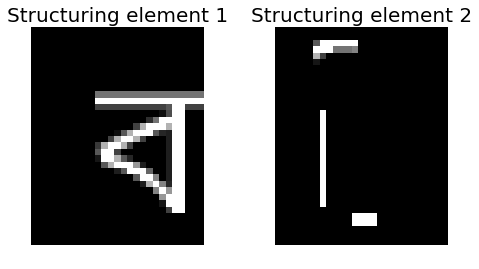

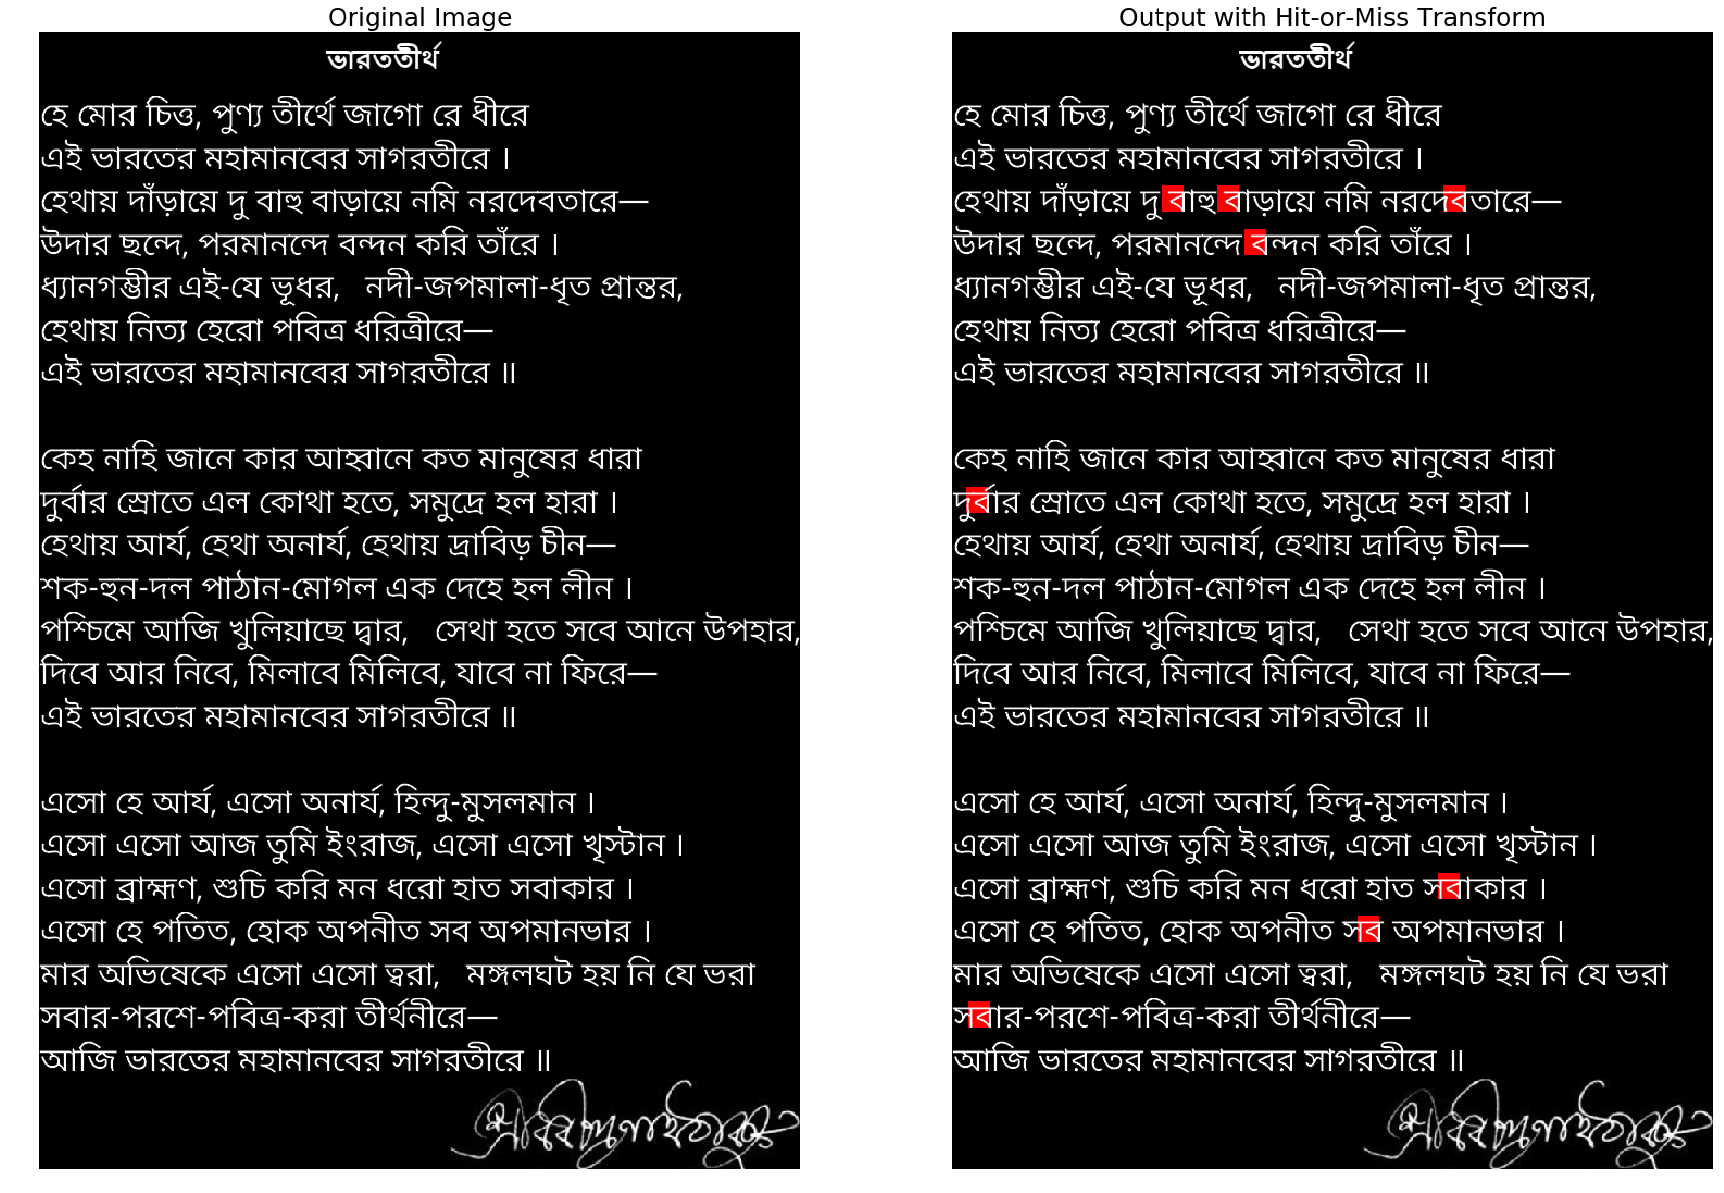

In [16]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from scipy import ndimage

def hit_or_miss_transform(im, s1, s2):
    im = rgb2gray(imread(im))
    m, n = im.shape
    s1 = rgb2gray(imread(s1))
    s2 = rgb2gray(imread(s2))
    print(im.shape, s1.shape, s2.shape)
    plt.gray()
    plt.figure(figsize=(8,4))
    plt.subplot(121), plt.imshow(s1), plt.axis('off'), plt.title('Structuring element 1', size=20)
    plt.subplot(122), plt.imshow(s2), plt.axis('off'), plt.title('Structuring element 2', size=20)
    plt.show()
    hom_transformed = ndimage.binary_hit_or_miss(im, structure1=s1, structure2=s2).astype(np.int)
    xs, ys = np.where(hom_transformed == 1)
    hom_transformed = gray2rgb(hom_transformed)
    w, h = 10, 12 #s1.shape
    #print(w,h,m,n)
    for i in range(len(xs)):
        x, y = (xs[i], ys[i])
        for j in range(max(0, x-h), min(m-1, x+h)):
            for k in range(max(0, y-w), min(n, y+w)):
                hom_transformed[j, k, 0] = 1.
        for j in range(max(0, x-h), min(m, x+h)):
            for k in range(max(0, y-w), min(n-1, y+w)):
                hom_transformed[j, k, 0] = 1.
    #np.max(hom_transformed)
    plt.figure(figsize=(30,60))
    #plt.imshow(hom_transformed.astype(np.float))
    plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original Image', size=25)
    plt.subplot(122), plt.imshow(np.clip(gray2rgb(im) + hom_transformed.astype(np.float), 0, 1)), plt.axis('off'), 
    plt.title('Output with Hit-or-Miss Transform', size=25)
    plt.show()

hit_or_miss_transform('images/poem.png', 'images/bo.png', 'images/bo_inv_1.png') 
hit_or_miss_transform('images/poem.png', 'images/bo.png', 'images/bo_inv_2.png') 

### Scene Change Detection

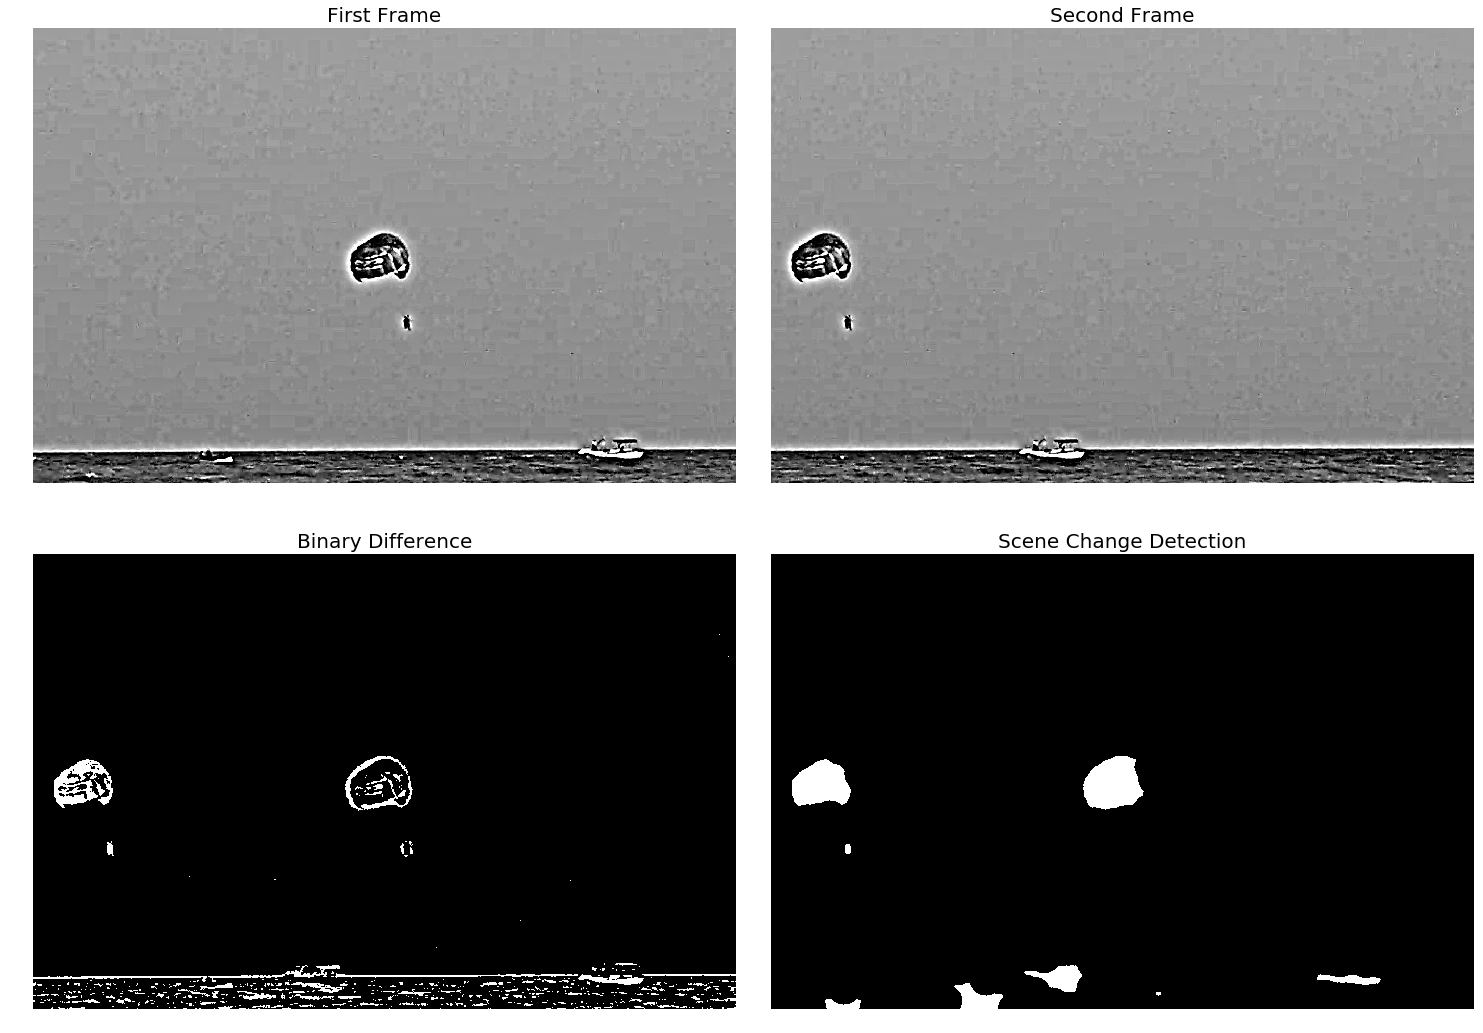

In [15]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.filters import unsharp_mask
from skimage.morphology import binary_closing, binary_opening, disk
import matplotlib.pylab as plt

im1 = unsharp_mask(rgb2gray(imread('images/frame1.png')), radius=10, amount=5)
im2 = unsharp_mask(rgb2gray(imread('images/frame2.png')), radius=10, amount=5)
im = im1 - im2
thres = threshold_otsu(im)
im[im > thres] = 1
im[im <= thres] = 0
im_morph = binary_opening(im, disk(3))
im_morph = binary_closing(im_morph, disk(30))
plt.gray()
plt.figure(figsize=(20,15))
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im1), plt.axis('off'), plt.title('First Frame', size=20)
plt.subplot(222), plt.imshow(im2), plt.axis('off'), plt.title('Second Frame', size=20)
plt.subplot(223), plt.imshow(im), plt.axis('off'), plt.title('Binary Difference', size=20)
plt.subplot(224), plt.imshow(im_morph), plt.axis('off'), plt.title('Scene Change Detection', size=20)
plt.show()

### Segmentation: Morphological Watershed

23 22


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


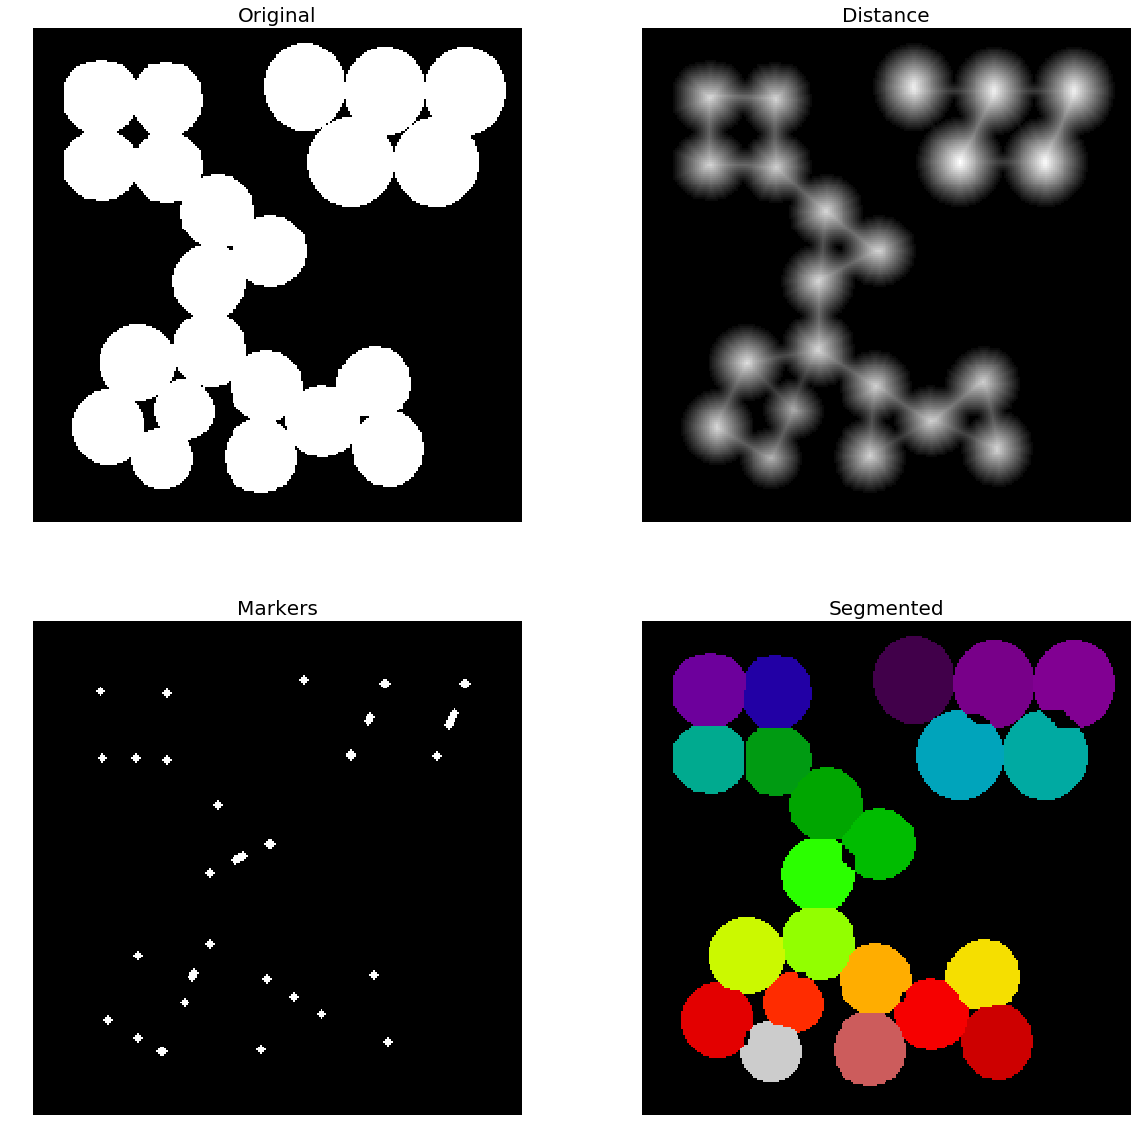

111 110


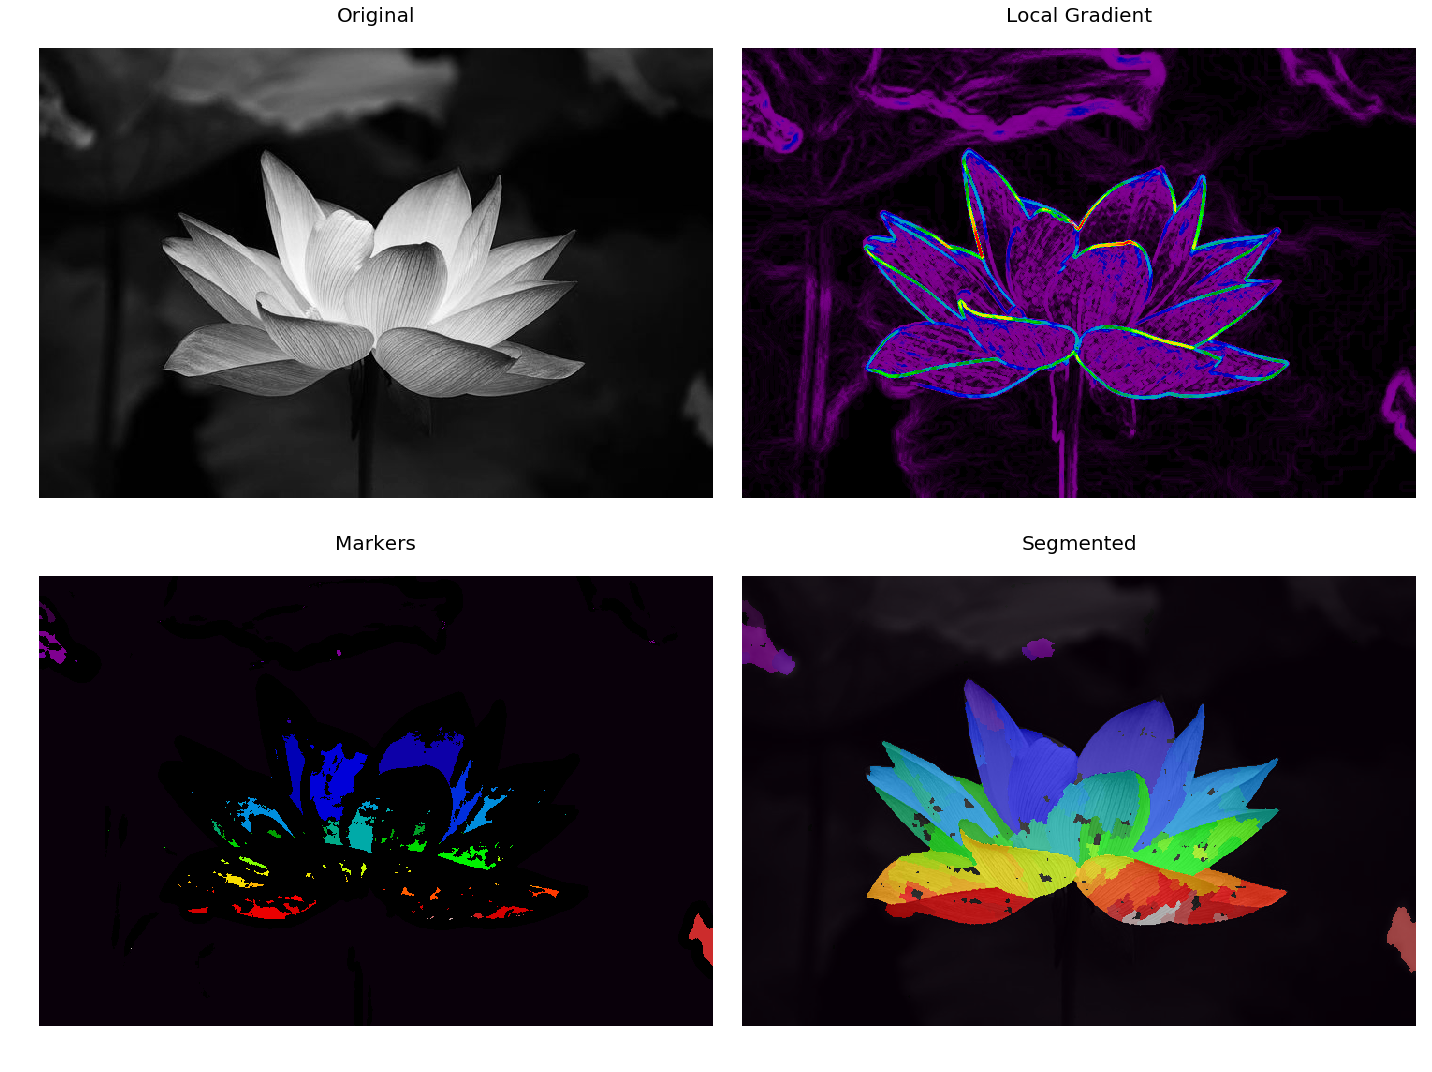

In [106]:
% matplotlib inline
from scipy import ndimage as ndi
from skimage.morphology import watershed, disk, binary_dilation, remove_small_objects
from skimage.filters import rank, threshold_otsu
from skimage.feature import peak_local_max
from skimage.measure import regionprops
from skimage.util import img_as_ubyte
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

image = img_as_ubyte(rgb2gray(imread('images/circles.png'))) #img_as_ubyte(data.camera())
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)
labels = remove_small_objects(labels, min_size=100)
props = regionprops(labels)
print(len(np.unique(labels)), len(props))

plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(image), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(222), plt.imshow(distance), plt.axis('off'), plt.title('Distance', size=20)
plt.subplot(223), plt.imshow(binary_dilation(markers, disk(2))), plt.axis('off'), plt.title('Markers', size=20)
plt.subplot(224), plt.imshow(labels, cmap='spectral'), plt.axis('off'), plt.title('Segmented', size=20)
plt.show()

image = img_as_ubyte(rgb2gray(imread('images/lotus.jpg')))
denoised = rank.median(image, disk(2))
# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 20
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

labels = watershed(gradient, markers)
labels = remove_small_objects(labels, min_size=100)
props = regionprops(labels)
print(len(np.unique(labels)), len(props))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original", size=20)

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[1].set_title("Local Gradient", size=20)

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers", size=20)

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented", size=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


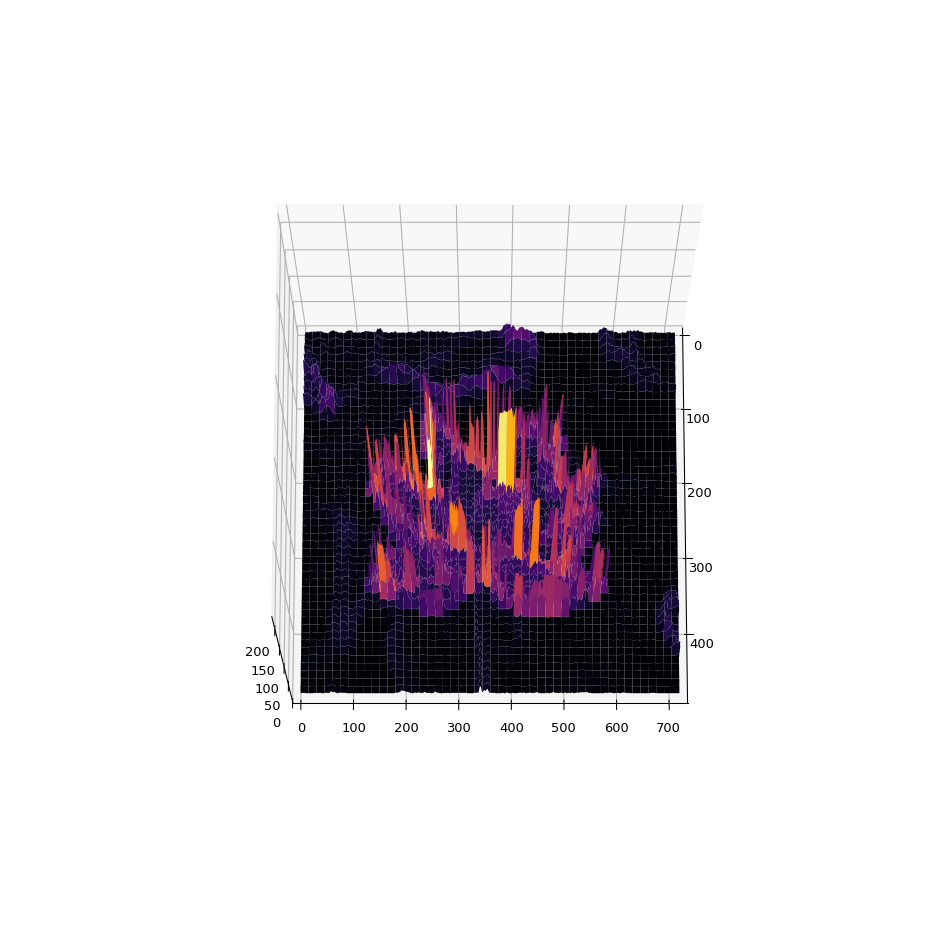

In [102]:
% matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

# Get information regarding the shape of the image. 
im_shape = np.shape(gradient)
x = np.arange(0, im_shape[0], 1)
y = np.arange(0, im_shape[1], 1)

# Make a grid 
x, y = np.meshgrid(x, y)

# Do the 3D plot.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x, y, np.transpose(gradient), cmap='inferno')
plt.xlim([0, im_shape[0]])
plt.ylim([0, im_shape[1]])

# Rotate and tilt the plot so peaks and valleys are obvious
ax.view_init(75, 360)